Copyright (C) 2016 The HDF Group                                                
Copyright (C) 2014 John Evans                                                   
                                                                                
This example code illustrates how to access and visualize a GESDISC AIRS grid in Python.                                                                      
                                                                                
If you have any questions, suggestions, or comments on this example, please use the HDF-EOS Forum (http://hdfeos.org/forums).  If you would like to see an example of any other NASA HDF/HDF-EOS data product that is not listed in the HDF-EOS Comprehensive Examples page (http://hdfeos.org/zoo), feel free to contact us at eoshelp@hdfgroup.org or post it at the HDF-EOS Forum (http://hdfeos.org/forums).                                                     
                                                                                               
                                                                                               
Tested under: Python 2.7.12 :: Anaconda 4.2.0 (x86_64)                          
Last updated: 2016-12-21 

# Access AIRS data from GES DISC via OPeNDAP

This example assumes that you have configured .netrc, .urs_cookies and .dodsrc file properly according to [1,2] because we will use netCDF4 python interface which is based on netCDF-C library.


In [6]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

opendap_url = 'https://acdisc.gesdisc.eosdis.nasa.gov:443/opendap/ncml/Aqua_AIRS_\
Level3/AIRS3STD.006/2003/AIRS.2003.02.05.L3.RetStd_IR001.v6.0.9.0.G13222004955.hd\
f.ncml'
DATAFIELD_NAME = 'Topography'
nc = Dataset(opendap_url)
data = nc.variables[DATAFIELD_NAME][:,:]
latitude = nc.variables['Latitude'][:]
longitude = nc.variables['Longitude'][:]

# Verify that data is accessible with 
# username & password in ~/.netrc, 
# cookies in ~/.urs_cookies, 
# and remote OPeNDAP server access information in ~/.dodsrc.
print latitude

[ 89.5  88.5  87.5  86.5  85.5  84.5  83.5  82.5  81.5  80.5  79.5  78.5
  77.5  76.5  75.5  74.5  73.5  72.5  71.5  70.5  69.5  68.5  67.5  66.5
  65.5  64.5  63.5  62.5  61.5  60.5  59.5  58.5  57.5  56.5  55.5  54.5
  53.5  52.5  51.5  50.5  49.5  48.5  47.5  46.5  45.5  44.5  43.5  42.5
  41.5  40.5  39.5  38.5  37.5  36.5  35.5  34.5  33.5  32.5  31.5  30.5
  29.5  28.5  27.5  26.5  25.5  24.5  23.5  22.5  21.5  20.5  19.5  18.5
  17.5  16.5  15.5  14.5  13.5  12.5  11.5  10.5   9.5   8.5   7.5   6.5
   5.5   4.5   3.5   2.5   1.5   0.5  -0.5  -1.5  -2.5  -3.5  -4.5  -5.5
  -6.5  -7.5  -8.5  -9.5 -10.5 -11.5 -12.5 -13.5 -14.5 -15.5 -16.5 -17.5
 -18.5 -19.5 -20.5 -21.5 -22.5 -23.5 -24.5 -25.5 -26.5 -27.5 -28.5 -29.5
 -30.5 -31.5 -32.5 -33.5 -34.5 -35.5 -36.5 -37.5 -38.5 -39.5 -40.5 -41.5
 -42.5 -43.5 -44.5 -45.5 -46.5 -47.5 -48.5 -49.5 -50.5 -51.5 -52.5 -53.5
 -54.5 -55.5 -56.5 -57.5 -58.5 -59.5 -60.5 -61.5 -62.5 -63.5 -64.5 -65.5
 -66.5 -67.5 -68.5 -69.5 -70.5 -71.5 -72.5 -73.5 -7

If Latitude values are printed correctly, let's plot the grid data on map.

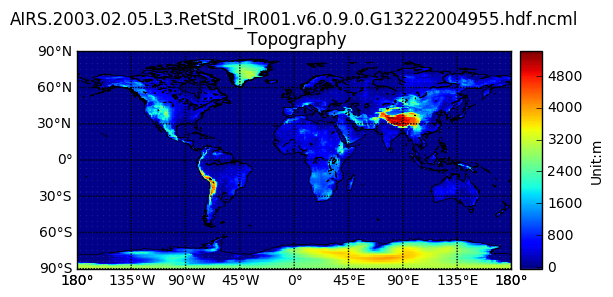

In [9]:
# Draw an equidistant cylindrical projection using the low resolution             
# coastline database.                                                             
m = Basemap(projection='cyl', resolution='l',
           llcrnrlat=-90, urcrnrlat = 90,
           llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 45.), labels=[0, 0, 0, 1])
m.pcolormesh(longitude, latitude, data, latlon=True, alpha=0.90)
cb = m.colorbar()
cb.set_label('Unit:m')
basename = os.path.basename(opendap_url)
plt.title('{0}\n {1}'.format(basename, DATAFIELD_NAME))
fig = plt.gcf()

# References
1. https://disc.gsfc.nasa.gov/registration/registration-for-data-access#ncdump
2. http://hdfeos.org/software/ncl_opendap_mls.php